# Citi Bike 2020 - 2021


**Acerca del conjunto de datos**
Citi Bike es un sistema público de bicicletas compartidas de propiedad privada que presta servicios en los distritos del Bronx, Brooklyn, Manhattan y Queens de la ciudad de Nueva York, así como en la ciudad de Jersey, Nueva Jersey. Nombrado en honor al patrocinador principal Citigroup, es operado por Motivate (anteriormente Alta Bicycle Share), con el ex director ejecutivo de la Autoridad de Transporte Metropolitano, Jay Walder, como director ejecutivo hasta el 30 de septiembre de 2018, cuando Lyft adquirió la compañía . Las bicicletas y estaciones del sistema utilizan tecnología de la marca BIXI de PBSC Urban Solutions.

En julio de 2019, hay 169.000 suscriptores anuales. Los usuarios de Citi Bike realizaron un promedio de 56,497 viajes por día en 2019, y el sistema alcanzó un total de 50 millones de viajes en octubre de 2017. fuente wikipedia

Este conjunto de datos contiene detalles de viajes para el año 2021 de enero a abril. Contiene 15 columnas cada una:

- duración del viaje - Duración en segundos
- hora de inicio - Hora y fecha de inicio 
- hora de parada - Fecha y hora de parada
- ID de la estación de inicio - ID de la estación de inicio
- Nombre de la estación de inicio - Nombre de la estación de inicio
- Latitud de la estación de inicio - Latitud de la estación de inicio 
- Longitud de la estación de inicio - Longitud del final de la estación de inicio
- ID de estación - ID de la estación final
- Nombre de la estación final - Nombre de la
- estación final 
- Latitud de la estación final - Latitud de la estación final
- Longitud de la estación final - Longitud de la estación final
ID de bicicleta - 
Tipo de usuario de ID de bicicleta - Cliente = usuario de pase de 24 horas o pase de 3 días ; Suscriptor =
Género del miembro anual - Cero = desconocido; 1=masculino; 2= femenino.
año de nacimiento - Año de nacimiento

#### Importamos librerías

In [2]:
#Acá no tengo la máquina virtual para trabajar.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#Agregamos estilos a nuestros gráficos
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (8, 8)

blues = sns.dark_palette('blue')

#### Datos Crudos de January 2020

In [3]:
df_january2020 = pd.read_csv('./archive (5)/CitiBike_Trip_Data/2020/January2020.csv')
df_february2020 = pd.read_csv('./archive (5)/CitiBike_Trip_Data/2020/February2020.csv')
df_april2020 = pd.read_csv('./archive (5)/CitiBike_Trip_Data/2020/April2020.csv')

In [4]:
#tripduration in seconds and gender: 0:unknown -  1:male  - 2:female
df_january2020.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,226,2020-01-01 00:04:50.1920,2020-01-01 00:08:37.0370,3186,Grove St PATH,40.719586,-74.043117,3211,Newark Ave,40.721525,-74.046305,29444,Subscriber,1984,2
1,377,2020-01-01 00:16:01.6700,2020-01-01 00:22:19.0800,3186,Grove St PATH,40.719586,-74.043117,3269,Brunswick & 6th,40.726012,-74.050389,26305,Subscriber,1989,2
2,288,2020-01-01 00:17:33.8770,2020-01-01 00:22:22.4420,3186,Grove St PATH,40.719586,-74.043117,3269,Brunswick & 6th,40.726012,-74.050389,29268,Customer,1989,1
3,435,2020-01-01 00:32:05.9020,2020-01-01 00:39:21.0660,3195,Sip Ave,40.730897,-74.063913,3280,Astor Place,40.719282,-74.071262,29278,Customer,1969,0
4,231,2020-01-01 00:46:19.6780,2020-01-01 00:50:11.3440,3186,Grove St PATH,40.719586,-74.043117,3276,Marin Light Rail,40.714584,-74.042817,29276,Subscriber,1983,2


In [5]:
df_january2020.shape

(26020, 15)

In [6]:
(
    df_january2020
    .info()
)
#Fecha tipo object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26020 entries, 0 to 26019
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tripduration             26020 non-null  int64  
 1   starttime                26020 non-null  object 
 2   stoptime                 26020 non-null  object 
 3   start station id         26020 non-null  int64  
 4   start station name       26020 non-null  object 
 5   start station latitude   26020 non-null  float64
 6   start station longitude  26020 non-null  float64
 7   end station id           26020 non-null  int64  
 8   end station name         26020 non-null  object 
 9   end station latitude     26020 non-null  float64
 10  end station longitude    26020 non-null  float64
 11  bikeid                   26020 non-null  int64  
 12  usertype                 26020 non-null  object 
 13  birth year               26020 non-null  int64  
 14  gender                

In [7]:
(
    df_january2020
    .dtypes
    .value_counts()
)
#Medio al pepe, si info ya me lo dice

int64      6
object     5
float64    4
Name: count, dtype: int64

¿En el describe() como saco columnas, que no sean por el tipo de dato?

In [8]:
#Comenzamos a ver valores raros, 520598 segundos andando en bici.Son 144 horas.
#Mínimo Fecha de nacimiento: 1888?
#Antes de continuar por aquellos valores, tratemos con los datos nulos o duplicados
df_january2020.describe()
#Hay varias columnas que no tienen sentido realizar su describe, cuando otras sí. Startstationid,EndStationid Startstationlongitude,latitude, BikeID

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,26020.000000,26020.000000,26020.000000,26020.000000,26020.000000,26020.000000,26020.000000,26020.000000,26020.000000,26020.000000
mean,540.897540,3305.578094,40.722574,-74.046602,3305.218217,40.722256,-74.046200,29179.361299,1981.163605,1.199769
std,4249.238936,184.011111,0.006669,0.010983,186.618387,0.006521,0.010890,3257.769791,10.310239,0.497721
min,61.000000,3184.000000,40.711130,-74.083639,525.000000,40.709651,-74.083639,26151.000000,1888.000000,0.000000
25%,225.000000,3195.000000,40.718355,-74.050444,3194.000000,40.718355,-74.050389,26303.000000,1976.000000,1.000000
50%,326.000000,3211.000000,40.721525,-74.043845,3211.000000,40.721124,-74.043117,29307.000000,1983.000000,1.000000
75%,501.000000,3276.000000,40.726012,-74.038526,3277.000000,40.726012,-74.038051,29571.000000,1989.000000,1.000000
max,520598.000000,3792.000000,40.748716,-74.032108,3792.000000,40.755942,-74.002116,42370.000000,2002.000000,2.000000


In [10]:
#Para facilitar las llamadas, renombramos las columnas
print( df_january2020.columns) # for columns
print('\n', df_january2020.index) # for row indexes

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

 RangeIndex(start=0, stop=26020, step=1)


In [11]:
df_january2020.rename(columns= {'start station id':'startstationid',
                     'start station name':'startstationname',
                     'start station latitude': 'startstationlatitude',
                     'start station longitude':'startstationlongitude',
                     'end station id': 'endstationid',
                     'end station name': 'endstationname',
                     'end station latitude':'endstationlatitude', 
                     'end station longitude': 'endstationlongitude',
                     'birth year':'birthyear'
                },
        inplace=True)
        
# Inplace : Si se debe modificar el DataFrame en lugar de crear uno nuevo. Si es Verdadero, se ignora el valor de la copia.

df_january2020.columns

Index(['tripduration', 'starttime', 'stoptime', 'startstationid',
       'startstationname', 'startstationlatitude', 'startstationlongitude',
       'endstationid', 'endstationname', 'endstationlatitude',
       'endstationlongitude', 'bikeid', 'usertype', 'birthyear', 'gender'],
      dtype='object')

In [13]:
(
    df_january2020
    .isnull()
    .any()
)

tripduration             False
starttime                False
stoptime                 False
startstationid           False
startstationname         False
startstationlatitude     False
startstationlongitude    False
endstationid             False
endstationname           False
endstationlatitude       False
endstationlongitude      False
bikeid                   False
usertype                 False
birthyear                False
gender                   False
dtype: bool

In [14]:
(
    df_january2020
    .duplicated()
    .sum()
)

0

In [15]:
df_january2020.describe(include='object')

,starttime,stoptime,startstationname,endstationname,usertype
count,26020,26020,26020,26020,26020
unique,26020,26019,51,53,2
top,2020-01-01 00:04:50.1920,2020-01-23 17:51:24.6330,Grove St PATH,Grove St PATH,Subscriber
freq,1,2,3100,3548,24436


In [21]:
#df_january2020.birthyear.max() --> 2002

#df_january2020.birthyear.min() --> 1888

df_january2020.query(f'birthyear <= {1930}') #¿Podría averiguar su edad con otras variables? ¿Vale la pena por solo 14 registros en 26020?
df_january2020_drop = df_january2020.drop(df_january2020[df_january2020['birthyear']==1888].index) # Los eliminamos el.index le dice que traiga dichos indices que cumplan con la condición

In [24]:
df_january2020_drop.query(f"tripduration >= {86000}") #86000 son 24 horas. 1 día
df_january2020_drop = df_january2020_drop.drop(df_january2020_drop[df_january2020['tripduration']>=86000].index)

C:\Users\Sol\AppData\Local\Temp\ipykernel_18964\1553160453.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_january2020_drop = df_january2020_drop.drop(df_january2020_drop[df_january2020['tripduration']>=86000].index)


In [25]:
df_january2020_drop.shape

(25999, 15)



¿Lugares de recogida con mayor popularidad en la ciudad?

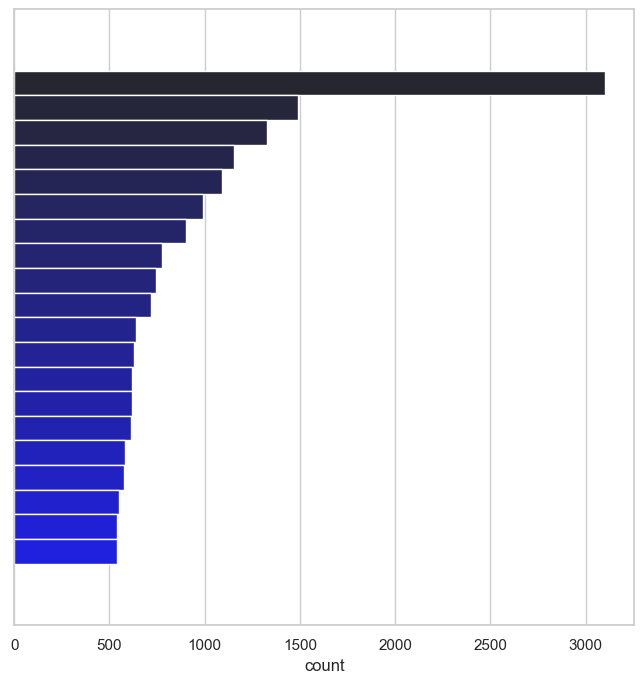

In [46]:
toplocation = (
    df_january2020_drop
    .value_counts('startstationname',sort=True)
    .reset_index(name='count')
    .head(20)
    .pipe(
        lambda df:(
            sns.barplot(
                data= df,
                x= 'count',
                hue='startstationname',
                palette='dark:blue',
                legend= False
                )
        )
    )
)

plt.show()